# <Center> Analysis of Controllable Drilling Parameters of 
# <Center> the Intermediate Section of a SAGD Producer Well


### Data Source: Pason - EDR(Electronic Drilling Recorder)
### Data Name: Drilling Parameters Producer Well
### Controlable Drilling Parameters: RPM, Total Pump Output (m3/min), WOB (kDaN)
### Dataset: DrillingParameters.csv

The high cost of a drilling operation comes from the drilling rig, directional tools, and equipment associated with the drilling operation. Thus, with the implementation of data science in drilling operations, companies have seen significant value in processing the massive amount of data produced by all the sensors installed at the rig. This project combines machine learning and industry experience to analyze how controllable drilling parameters such as weight on bit (WOB), total pump output (TPO), and revolution per minute (RPM) impact the rate of penetration (ROP) of the intermediate section of a Steam-Assisted Gravity Drainage (SAGD) production well. 

The ROP prediction is an incentive for cost reduction for future SAGD projects. Many variables can impact the ROP; however, this study only considers controllable drilling parameters that can be adjusted by the driller. 

In [1]:
import pickle

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
# Option 1 - load Controllable variables of the drilling Parameters 

data = pd.read_csv('drillingPWRG2.csv',
                   usecols=['Standpipe_pressure_kPa','RPM', 'WOB_kDaN', 'Total_pump_output_m3_min','ROP_m_hr',
                           'Torque_N_m'])
data.head(10)

,WOB_kDaN,RPM,Torque_N_m,Total_pump_output_m3_min,Standpipe_pressure_kPa,ROP_m_hr
0,1.9,33,1657.98,3.37,6060,1.43
1,5.3,33,2580.24,3.36,6346,59.88
2,6.0,33,3326.33,3.36,6705,100.36
3,6.2,33,3357.42,3.36,6743,99.23
4,6.9,34,4062.06,3.36,6741,99.80
5,6.2,32,3606.12,3.36,6761,99.81
6,5.8,33,3398.87,3.36,6806,99.81
7,6.0,32,3191.62,3.36,6761,99.77
8,7.1,32,3865.18,3.36,6740,103.11
9,6.7,33,3005.10,3.36,6724,103.11


In [3]:
# Option 2 - load Controllable variables of the drilling Parameters
df_dataset=pd.read_csv("DrillingPWRG2.csv")

df1 = pd.DataFrame(df_dataset,
                      columns=[
                          'Bit_depth_m_MD','Standpipe_pressure_kPa','RPM', 'WOB_kDaN', 'Total_pump_output_m3_min','ROP_m_hr',
                          'Torque_N_m'
                      ])
df1.head()

,Bit_depth_m_MD,Standpipe_pressure_kPa,RPM,WOB_kDaN,Total_pump_output_m3_min,ROP_m_hr,Torque_N_m
0,212.68,6060,33,1.9,3.37,1.43,1657.98
1,212.89,6346,33,5.3,3.36,59.88,2580.24
2,213.17,6705,33,6.0,3.36,100.36,3326.33
3,213.45,6743,33,6.2,3.36,99.23,3357.42
4,213.72,6741,34,6.9,3.36,99.80,4062.06


In [4]:
df1.describe(include = "all").transpose()

,count,mean,std,min,25%,50%,75%,max
Bit_depth_m_MD,4652.0,533.755475,171.900103,212.68,392.895,520.81,698.98,808.59
Standpipe_pressure_kPa,4652.0,9336.803955,1684.836684,1680.00,7812.750,9901.50,10693.00,12790.00
RPM,4652.0,15.847592,16.003809,0.00,0.000,6.50,31.00,58.00
WOB_kDaN,4652.0,8.653332,5.109001,0.10,4.900,7.10,12.40,20.80
Total_pump_output_m3_min,4652.0,3.359540,0.027978,3.27,3.340,3.36,3.38,3.47
ROP_m_hr,4652.0,53.326365,24.738741,1.43,37.810,52.06,70.43,176.83
Torque_N_m,4652.0,3090.989264,3543.838819,0.00,0.000,1730.52,6292.57,15574.70


In [5]:
df1['ROP_m_hr'].median()

52.06

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pl
%matplotlib inline

#for Q-Q plots
import scipy.stats as stats

from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

import ssl


In [7]:
def diagnostic_plots(df, variable):
    #function takes a dataframe (df) and 
    # the variable of interest as arguments
    
    # define figure size
    plt.figure(figsize=(14, 4))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins= 50)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Variable quantiles')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

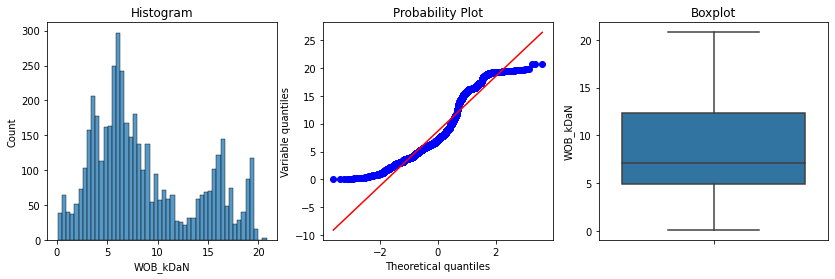

In [8]:
diagnostic_plots(df1, 'WOB_kDaN')

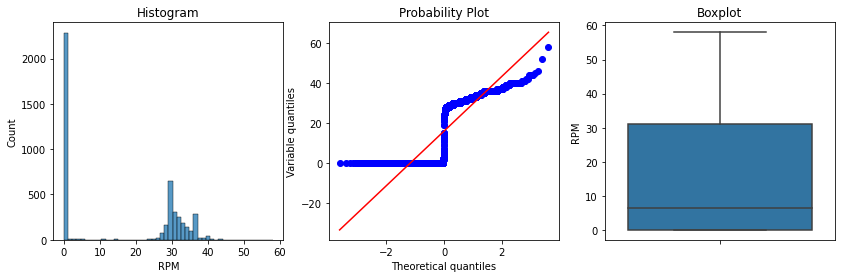

In [9]:
diagnostic_plots(df1, 'RPM')

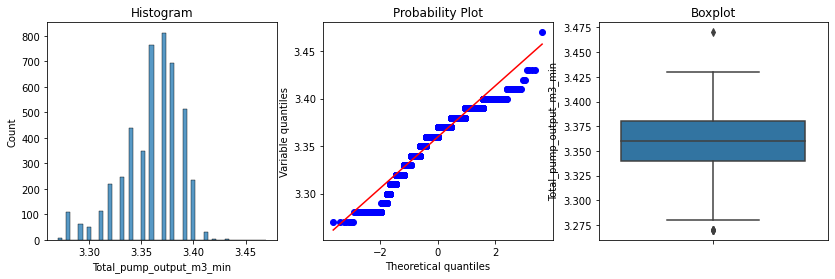

In [10]:
diagnostic_plots(df1, 'Total_pump_output_m3_min')

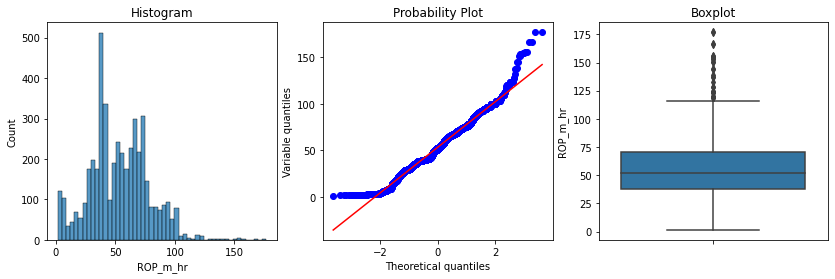

In [11]:
diagnostic_plots(df1, 'ROP_m_hr')

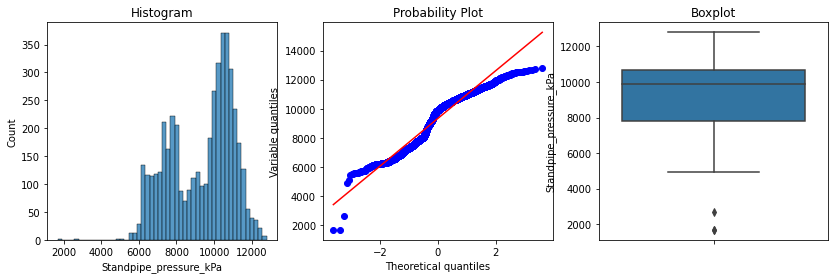

In [12]:
diagnostic_plots(df1, 'Standpipe_pressure_kPa')

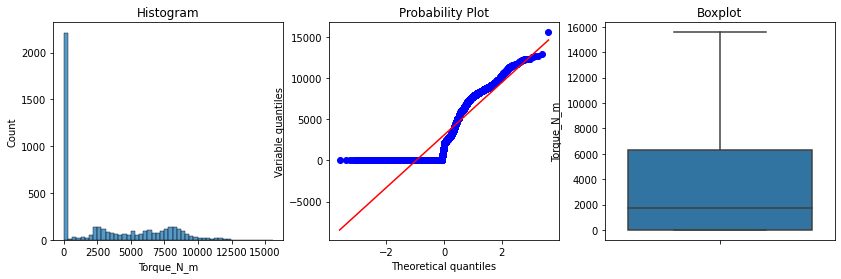

In [13]:
diagnostic_plots(df1, 'Torque_N_m')

In [14]:
def find_normal_boundaries(df, variable):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df1[variable].mean() + 3 * df1[variable].std()
    lower_boundary = df[variable].mean() - 3 * df1[variable].std()

    return upper_boundary, lower_boundary

In [15]:
# calculate boundaries for ROP
upper_boundary, lower_boundary = find_normal_boundaries(df1, 'ROP_m_hr')
upper_boundary, lower_boundary

(127.54258737062915, -20.889857362030703)

In [16]:
# inspect the number and percentage of outliers for ROP

print('total variables: {}'.format(len(df1)))

print('ROP with more than 127.54 m/hr (right end outliers): {}'.format(
    len(df1[df1['ROP_m_hr'] > upper_boundary])))

print()
print('% right end outliers: {}'.format(
    len(df1[df1['ROP_m_hr'] > upper_boundary]) / len(df1)))

total variables: 4652
ROP with more than 127.54 m/hr (right end outliers): 20

% right end outliers: 0.004299226139294927


Using Extreme Value Analysis we identified outliers at both ends of the distribution of ROP. The percentage of outliers is small (0.429% considering the 1 tail). That is, rare values, rare occurrences.

#### Note: From the above we conclude that values bigger than 127.54 occur very rarely for the variable ROP_m_hr. Therefore, we can consider them outliers.

In [17]:
new_df1= df1.loc[(df1['ROP_m_hr'].abs()<=127)]
new_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bit_depth_m_MD,4632.0,533.589437,172.202615,212.68,392.1325,520.28,699.8375,808.59
Standpipe_pressure_kPa,4632.0,9329.229275,1683.928893,1680.00,7809.7500,9890.00,10687.0000,12790.00
RPM,4632.0,15.845855,16.004763,0.00,0.0000,6.50,31.0000,58.00
WOB_kDaN,4632.0,8.626533,5.100251,0.10,4.9000,7.10,12.2000,20.80
Total_pump_output_m3_min,4632.0,3.359629,0.027918,3.27,3.3400,3.36,3.3800,3.47
ROP_m_hr,4632.0,52.906997,23.935195,1.43,37.7875,52.05,70.0200,124.03
Torque_N_m,4632.0,3084.357905,3539.099756,0.00,0.0000,1709.80,6289.9800,15574.70


In [18]:
new_df1.median()

Bit_depth_m_MD               520.28
Standpipe_pressure_kPa      9890.00
RPM                            6.50
WOB_kDaN                       7.10
Total_pump_output_m3_min       3.36
ROP_m_hr                      52.05
Torque_N_m                  1709.80
dtype: float64

In [19]:
new_df1.to_csv(r'new_df1_with_depth.csv', index=False)

In [20]:
def diagnostic_plots(df, variable):
    #function takes a dataframe (df) and 
    # the variable of interest as arguments
    
    # define figure size
    plt.figure(figsize=(14, 4))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins= 50)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Variable quantiles')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

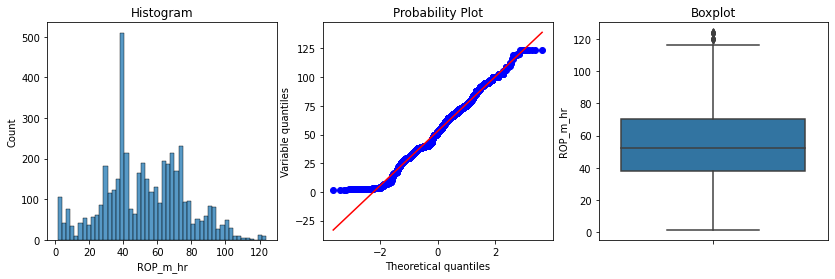

In [21]:
diagnostic_plots(new_df1, 'ROP_m_hr')

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('ROP_m_hr ~ (WOB_kDaN) + (RPM) + (Total_pump_output_m3_min) +(Bit_depth_m_MD)',
           data=new_df1).fit()
anova_result = sm.stats.anova_lm(model, typ=3)
print(anova_result)
print(model.summary())

                                sum_sq      df           F         PR(>F)
Intercept                 9.150371e+04     1.0  204.264845   2.237310e-45
WOB_kDaN                  1.359930e+05     1.0  303.578802   6.671943e-66
RPM                       1.173164e+05     1.0  261.886922   2.433591e-57
Total_pump_output_m3_min  7.270187e+04     1.0  162.293274   1.458987e-36
Bit_depth_m_MD            3.557547e+05     1.0  794.155612  2.161013e-161
Residual                  2.072739e+06  4627.0         NaN            NaN
                            OLS Regression Results                            
Dep. Variable:               ROP_m_hr   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     323.9
Date:                Mon, 16 May 2022   Prob (F-statistic):          4.88e-246
Time:                        19:18:53   Log-Likelihood:                -20709.
No. Obse

The results presents that Depth (mMD) is a significant factor and the most useful term in explaining the variation in ROP. the F value of 794.15 with a P-value (RR>F) to the power of minus 161 demostrates that the model is significant.

eval_env: 1


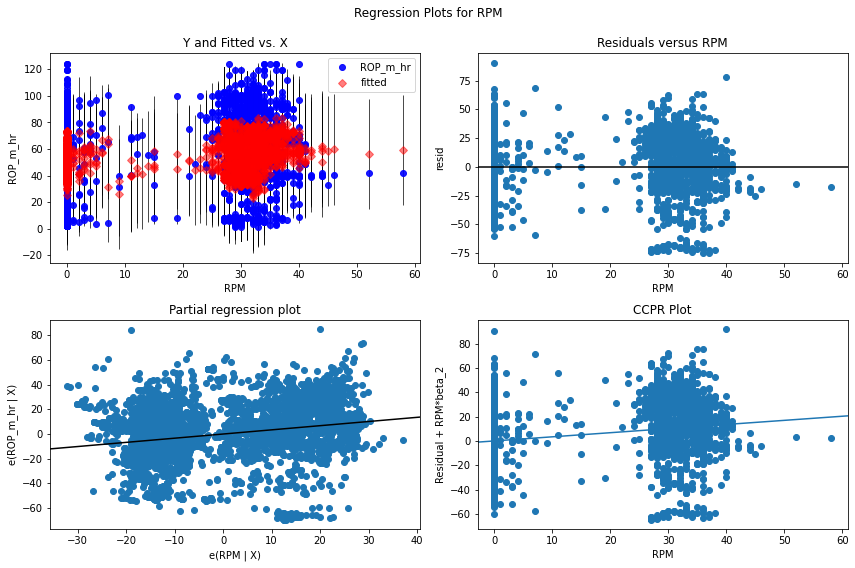

In [23]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'RPM', fig=fig)

eval_env: 1


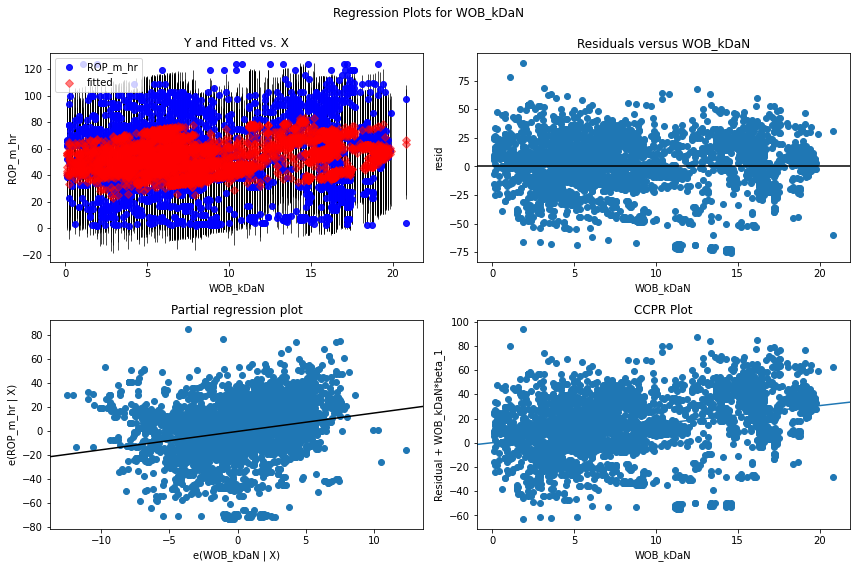

In [24]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'WOB_kDaN', fig=fig)

eval_env: 1


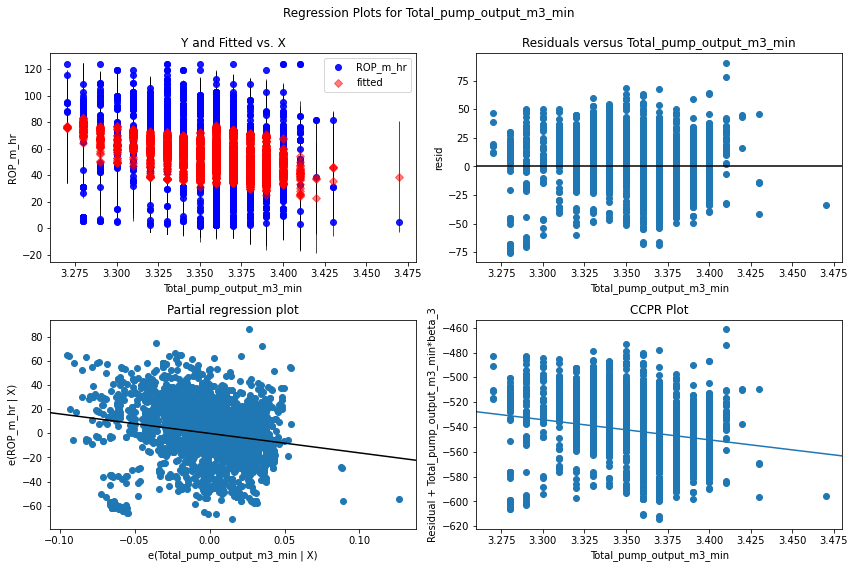

In [25]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Total_pump_output_m3_min', fig=fig)

eval_env: 1


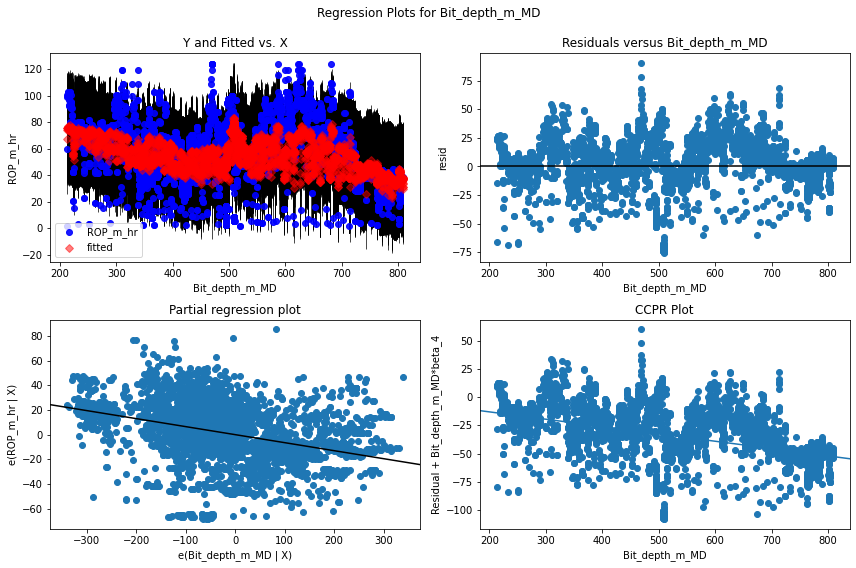

In [26]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Bit_depth_m_MD', fig=fig)

In [27]:
from scipy.interpolate import griddata

def plot_contour(x,y,z,resolution = 1000,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

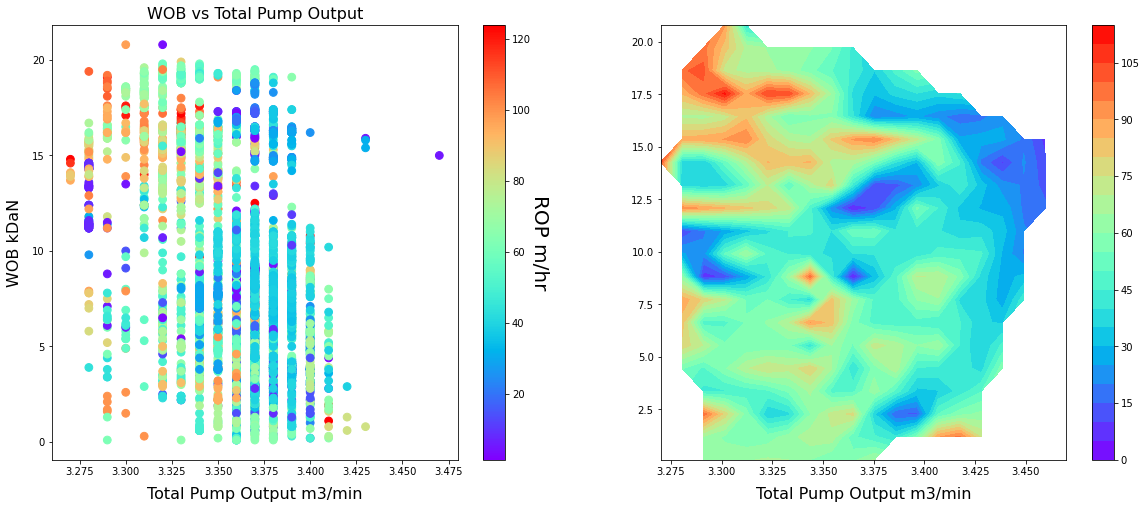

In [28]:
# Plot the first x and y axes:
x = new_df1.Total_pump_output_m3_min
y = new_df1.WOB_kDaN
z= new_df1.ROP_m_hr

plt.subplots(figsize=(20,8))


# row 1, column 2, count 1
plt.subplot(1, 2, 1)



colors = new_df1.ROP_m_hr
plt.scatter(x, y, c=colors, s= 60, cmap='rainbow') 

cbar = plt.colorbar()

plt.title("WOB vs Total Pump Output", fontsize=16)
plt.xlabel("Total Pump Output m3/min", fontsize=16, labelpad=10)
plt.ylabel("WOB kDaN", fontsize=16, labelpad=10)
cbar.set_label('ROP m/hr', rotation=270, fontsize=20, labelpad=18)

# row 1, column 2, count 2
plt.subplot(1, 2, 2)


X,Y,Z = plot_contour(x,y,z,resolution = 20, contour_method='linear')


plt.contourf(X, Y, Z, 25, cmap='rainbow')
plt.xlabel("Total Pump Output m3/min", fontsize=16, labelpad=10)
cbar = plt.colorbar()

plt.show()

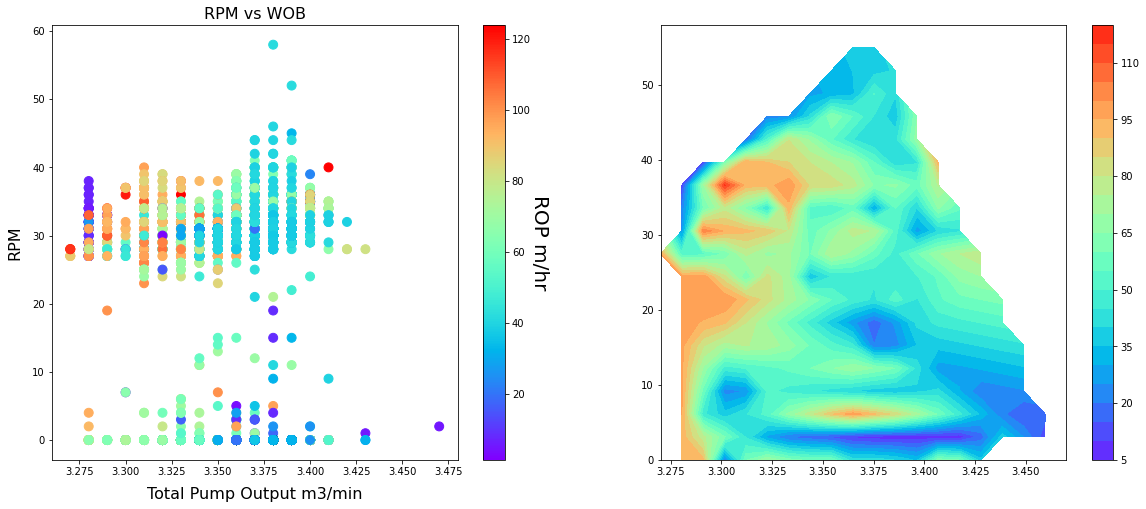

In [29]:
# Plot the first x and y axes:
x = new_df1.Total_pump_output_m3_min
y = new_df1.RPM
z= new_df1.ROP_m_hr

plt.subplots(figsize=(20,8))

# row 1, column 2, count 1
plt.subplot(1, 2, 1)

colors = new_df1.ROP_m_hr
plt.scatter(x, y, c=colors, s=80, cmap='rainbow') 

cbar = plt.colorbar()

plt.title("RPM vs WOB", fontsize=16)
plt.xlabel("Total Pump Output m3/min", fontsize=16, labelpad=10)
plt.ylabel("RPM", fontsize=16, labelpad=10)
cbar.set_label('ROP m/hr', rotation=270, fontsize=20, labelpad=18)

# row 1, column 2, count 2
plt.subplot(1, 2, 2)


X,Y,Z = plot_contour(x,y,z,resolution = 20,contour_method='linear')


plt.contourf(X, Y, Z, 25, cmap='rainbow', vmin=0, vmax=125)
cbar = plt.colorbar()

plt.show()

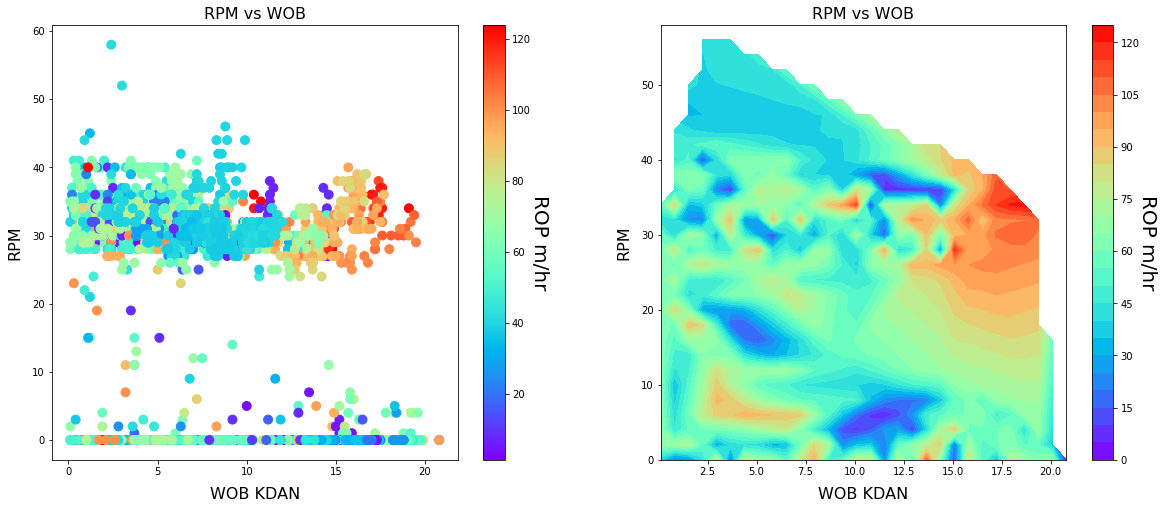

In [30]:
# Plot the first x and y axes:
x = new_df1.WOB_kDaN
y = new_df1.RPM
z= new_df1.ROP_m_hr

plt.subplots(figsize=(20,8))

# row 1, column 2, count 1
plt.subplot(1, 2, 1)

colors = new_df1.ROP_m_hr
plt.scatter(x, y, c=colors, s=80, cmap='rainbow') 

cbar = plt.colorbar()

plt.title("RPM vs WOB", fontsize=16)
plt.xlabel("WOB KDAN", fontsize=16, labelpad=10)
plt.ylabel("RPM", fontsize=16, labelpad=10)
cbar.set_label('ROP m/hr', rotation=270, fontsize=20, labelpad=18)

# row 1, column 2, count 2
plt.subplot(1, 2, 2)


X,Y,Z = plot_contour(x,y,z,resolution = 30,contour_method='linear')


plt.contourf(X, Y, Z, 25, cmap='rainbow')
cbar = plt.colorbar()
plt.title("RPM vs WOB", fontsize=16)
plt.xlabel("WOB KDAN", fontsize=16, labelpad=10)
plt.ylabel("RPM", fontsize=16, labelpad=10)
cbar.set_label('ROP m/hr', rotation=270, fontsize=20, labelpad=18)

plt.show()

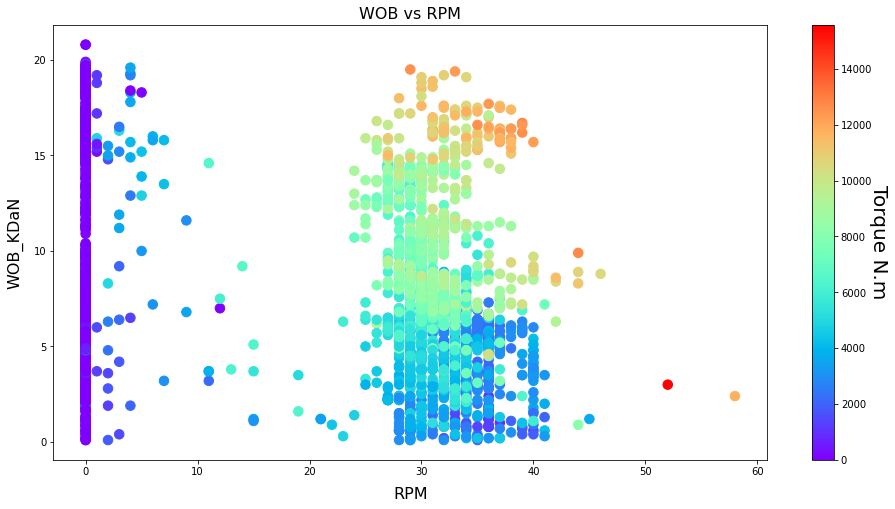

In [31]:
# Plot the first x and y axes:

colors = new_df1.Torque_N_m


plt.subplots(figsize=(16,8))

plt.scatter(x = new_df1.RPM, y = new_df1.WOB_kDaN, c=colors, s= 90, cmap= 'rainbow') 

cbar = plt.colorbar()

plt.title("WOB vs RPM", fontsize=16)
plt.xlabel("RPM", labelpad=10, fontsize=16)
plt.ylabel("WOB_KDaN", labelpad=10, fontsize=16)

cbar.set_label('Torque N.m', rotation=270, fontsize=20, labelpad=16)

plt.show()

In [32]:
new_df1.to_csv(r'ROP_RPM_FR_WOB_BitDepth.csv', index=False)

In [33]:
#https://www.journaldev.com/45109/normalize-data-in-python

from sklearn.preprocessing import StandardScaler

scaled_features = df1.copy()

col_names = ['Bit_depth_m_MD','WOB_kDaN','RPM',
             'Total_pump_output_m3_min']

features = scaled_features[col_names]


scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
scaled_features.head()


,Bit_depth_m_MD,Standpipe_pressure_kPa,RPM,WOB_kDaN,Total_pump_output_m3_min,ROP_m_hr,Torque_N_m
0,-1.868003,6060,1.071886,-1.321992,0.373908,1.43,1657.98
1,-1.866782,6346,1.071886,-0.656428,0.016444,59.88,2580.24
2,-1.865153,6705,1.071886,-0.519400,0.016444,100.36,3326.33
3,-1.863524,6743,1.071886,-0.480250,0.016444,99.23,3357.42
4,-1.861953,6741,1.134377,-0.343222,0.016444,99.80,4062.06


In [34]:
impfeatures =['Bit_depth_m_MD','WOB_kDaN', 'RPM', 'Total_pump_output_m3_min']

target = ['ROP_m_hr']

print(impfeatures)
print(target)


X = scaled_features[impfeatures]
y = scaled_features[target]

ts=0.2

['Bit_depth_m_MD', 'WOB_kDaN', 'RPM', 'Total_pump_output_m3_min']
['ROP_m_hr']


In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=ts)
print("my x_train===========================")
print(X_train)
print("My x_test ============================")
print(X_test)

print("My y_train ============================")
print(y_train)

print("My y_test =============================")
print(y_test)

my x_train===========================
      Bit_depth_m_MD  WOB_kDaN       RPM  Total_pump_output_m3_min
1711       -0.438939  0.087437 -0.990345                  0.731372
3747        1.134586 -0.186619  0.946902                 -0.341020
929        -0.994961 -0.930484 -0.990345                  0.731372
1602       -0.522543 -0.617277 -0.990345                  1.446300
2511        0.045581 -0.499825  1.071886                  0.373908
...              ...       ...       ...                       ...
832        -1.055584 -1.126238 -0.990345                  0.016444
1336       -0.686493 -1.067512 -0.990345                  1.088836
3373        0.849448  1.222810  0.884410                 -2.128341
1699       -0.450051 -0.284496 -0.990345                  1.088836
1175       -0.812393 -1.654774  1.321853                  0.016444

[3721 rows x 4 columns]
My x_test ============================
      Bit_depth_m_MD  WOB_kDaN       RPM  Total_pump_output_m3_min
1662       -0.476348 -0.558

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

In [37]:
X_train.head()

,Bit_depth_m_MD,WOB_kDaN,RPM,Total_pump_output_m3_min
1711,-0.438939,0.087437,-0.990345,0.731372
3747,1.134586,-0.186619,0.946902,-0.341020
929,-0.994961,-0.930484,-0.990345,0.731372
1602,-0.522543,-0.617277,-0.990345,1.446300
2511,0.045581,-0.499825,1.071886,0.373908


In [38]:
rf.feature_importances_

array([0.69137985, 0.1881897 , 0.06700607, 0.05342439])

Text(0.5, 0, 'Relative Importance')

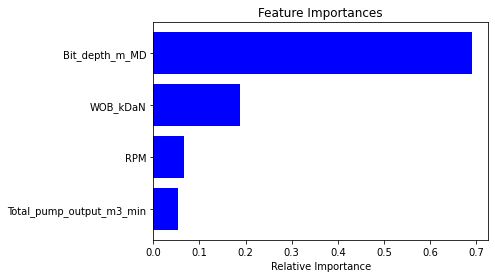

In [39]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [40]:
y_pred = rf.predict(X_test)

In [41]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.685404296455425
Root Mean Squared Error: 10.304848573711899


In [42]:
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.8321525452322293


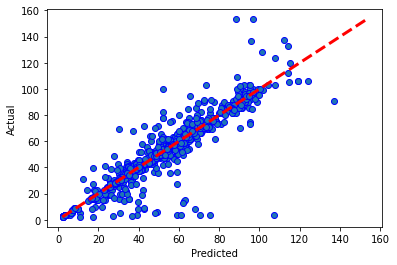

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()